In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

datasets = load_dataset('lukebarousse/data_jobs')

df = datasets['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df['job_skills'] = df['job_skills'].apply(lambda skl_lst: ast.literal_eval(skl_lst) if pd.notna(skl_lst) else skl_lst )

In [42]:
df_da = df[df.job_title_short == 'Data Analyst'].copy()

df_da['job_posted_month'] = df_da.job_posted_date.dt.month

df_da_explode = df_da.explode('job_skills')

df_pivot = df_da_explode.pivot_table(
    index='job_posted_month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_pivot.loc['total']= df_pivot.sum()

df_da_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index].copy()
df_da_pivot.drop('total', inplace=True)
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['month'] = df_da_pivot.job_posted_month.apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_pivot.set_index('month',inplace=True)
df_da_pivot.drop(columns='job_posted_month', inplace=True)

df_da_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


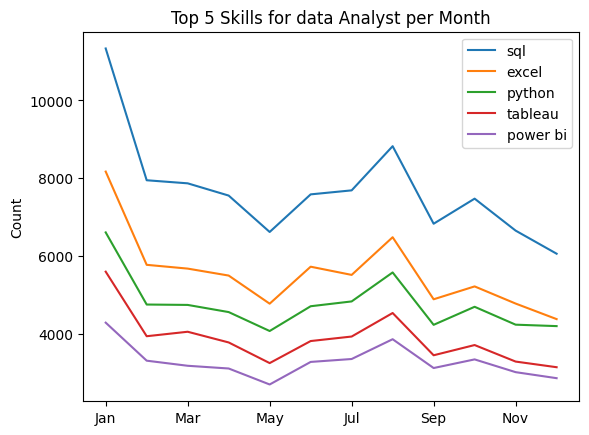

In [45]:
df_da_pivot.iloc[:,:5].plot(kind="line")

plt.title('Top 5 Skills for data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.legend()
plt.show()